In [1]:
from pdVCF.pdVCF import VCF
import copy
import pandas as pd
import seaborn as sns

In [2]:
f = 'vcfs/vep.dbSNP.var.ug.both.yale.taad.filters.renamed.vcf'
vcf = VCF(f)

/home/david/projects/pdVCF/pdVCF/vcf2dataframe.py:262: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop('UID', axis=1)


In [3]:
vcf_uk = VCF('vcfs/var.both.taadUkJan2017.filters.vcf')

/home/david/projects/pdVCF/pdVCF/vcf2dataframe.py:262: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop('UID', axis=1)


In [38]:
def ab_stuff(vcf):
    AB_list = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

    data = []

    for ab in AB_list:
        v = copy.deepcopy(vcf)

        ab_min = "AB > {}".format( ab)
        ab_max = "AB <= {}".format(1)

        v.filter_vcf([ab_min, ab_max, 'DP >= 50', 'GQ >= 30', 'GT != 0/0', 'GT != ./.'], op='&', how='any')
        not_in_DB = len(v.vcf[v.vcf['ID'] == '.'])

        if v.vcf.shape[0] > 0:
            percent = not_in_DB / v.vcf.shape[0] * 100
            print("{} ({}/{}) of variants are not in dbSNP for AB between {}-{}".format(percent, not_in_DB, v.vcf.shape[0], 1, ab))
        else:
            print("0 variants after filtering for AB between {}-{}".format(ab_min, ab_max))
            pass

        data.append([ab, v.vcf.shape[0], not_in_DB, percent])




    df = pd.DataFrame(columns=['AB', 'No. Variants', 'Not in dbSNP', 'Percent'],
                      data=data)
    return df



In [39]:
df_yale = ab_stuff(vcf)

67.24137931034483 (3042/4524) of variants are not in dbSNP for AB between 1-0.01
67.2566371681416 (3040/4520) of variants are not in dbSNP for AB between 1-0.05
63.13956603268149 (2357/3733) of variants are not in dbSNP for AB between 1-0.1
37.34211971444261 (680/1821) of variants are not in dbSNP for AB between 1-0.2
26.301369863013697 (384/1460) of variants are not in dbSNP for AB between 1-0.3
20.527156549520768 (257/1252) of variants are not in dbSNP for AB between 1-0.4
15.333333333333332 (138/900) of variants are not in dbSNP for AB between 1-0.5
13.94422310756972 (70/502) of variants are not in dbSNP for AB between 1-0.6
10.294117647058822 (35/340) of variants are not in dbSNP for AB between 1-0.7
7.446808510638298 (21/282) of variants are not in dbSNP for AB between 1-0.8
5.426356589147287 (14/258) of variants are not in dbSNP for AB between 1-0.9
0 variants after filtering for AB between AB > 1-AB <= 1


In [40]:
df_uk = ab_stuff(vcf_uk)

50.05285412262156 (947/1892) of variants are not in dbSNP for AB between 1-0.01
50.203606748109365 (863/1719) of variants are not in dbSNP for AB between 1-0.05
46.72960215778827 (693/1483) of variants are not in dbSNP for AB between 1-0.1
28.197381671701915 (280/993) of variants are not in dbSNP for AB between 1-0.2
20.794392523364486 (178/856) of variants are not in dbSNP for AB between 1-0.3
17.177097203728362 (129/751) of variants are not in dbSNP for AB between 1-0.4
13.644524236983843 (76/557) of variants are not in dbSNP for AB between 1-0.5
12.084592145015106 (40/331) of variants are not in dbSNP for AB between 1-0.6
10.78838174273859 (26/241) of variants are not in dbSNP for AB between 1-0.7
7.981220657276995 (17/213) of variants are not in dbSNP for AB between 1-0.8
3.9800995024875623 (8/201) of variants are not in dbSNP for AB between 1-0.9
0 variants after filtering for AB between AB > 1-AB <= 1


In [41]:
var = df_yale['No. Variants'] + df_uk['No. Variants']
no = df_yale['Not in dbSNP'] + df_uk['Not in dbSNP']
percent = no/var * 100

df = pd.concat([df_yale['AB'], var, no, percent.rename('Percent')], axis=1)
df

,AB,No. Variants,Not in dbSNP,Percent
0,0.01,6416,3989,62.172693
1,0.05,6239,3903,62.558102
2,0.10,5216,3050,58.473926
3,0.20,2814,960,34.115139
4,0.30,2316,562,24.265976
5,0.40,2003,386,19.271093
6,0.50,1457,214,14.687714
7,0.60,833,110,13.205282
8,0.70,581,61,10.499139
9,0.80,495,38,7.676768


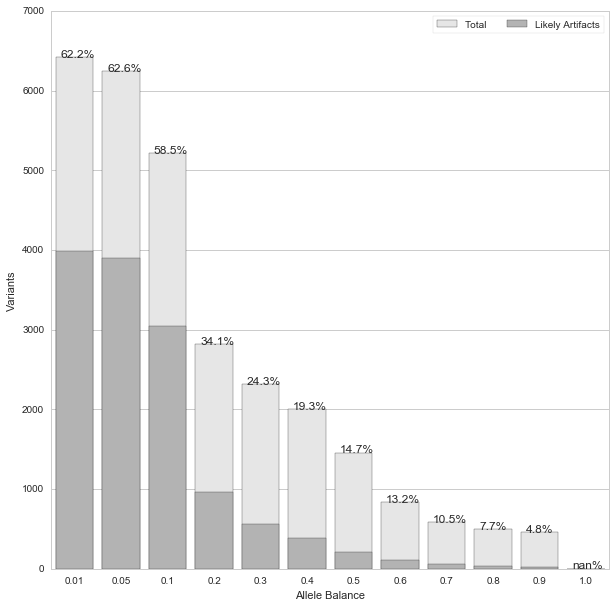

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# all vars
sns.set_color_codes("pastel")
sns.barplot(y="No. Variants", x="AB", data=df,
            label="Total", color="0.9")

# vars NOT in dbSNP
sns.set_color_codes("muted")
sns.barplot(y="Not in dbSNP", x="AB", data=df,
            label="Likely Artifacts", color="0.7")

ax.set(ylabel='Variants', xlabel='Allele Balance')
ax.legend(ncol=2, loc="upper right", frameon=True)


for x in range(len(df)):
    ax.text(x-0.3, ax.patches[x].get_height()+4, "{}%".format(round(df['Percent'].ix[x], 1)))

fig = ax.get_figure()
fig.savefig('AB Series Present in dbSNP.TEST.png')
